# G2M Insight for Cab Investment Firm

**The Client**

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

**Project delivery:**

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. 

Data Set: 

You have been provided 4 individual data sets. Time period of data is from **31/01/2016 to 31/12/2018**.

Below are the list of datasets which are provided for the analysis:

- **Cab_Data** – this file includes details of transaction for 2 cab companies

- **Customer_ID** – this is a mapping table that contains a unique identifier which links the customer’s demographic details

- **Transaction_ID** – this is a mapping table that contains transaction to customer mapping and payment mode

- **City** – this file contains list of US cities, their population and number of cab users


You should fully investigate and understand each data set.

- Review the Source Documentation
- Understand the field names and data types
- Identify relationships across the files
- Field/feature transformations
- Determine which files should be joined versus which ones should be appended
- Create master data and explain the relationship
- Identify and remove duplicates
- Perform other analysis like NA value and outlier detection
 

Whatever and how many slides you prepare(Be creative and come up with meaningful insight):

The idea is to create a hypothesis, engage with the data, think critically, and use various analytical approaches to produce unique insights.

You are not limited to only utilizing the data you have been provided.

We encourage you to find third party data sets which correspond to the overall theme and geographical properties of the data provided.  For Example: you can leverage US holiday data/ weather data

Also, do research on overall cab industry in US and try to relate that with the trend in data

**Analysis**

Create multiple hypothesis and investigate:

You will need to generate 5-7 hypothesis initially to investigate as some will not prove what you are expecting.

For Example: “Is there any seasonality in number of customers using the cab service?”

**Areas to investigate:**

- Which company has maximum cab users at a particular time period?
- Does margin proportionally increase with increase in number of customers?
- What are the attributes of these customer segments?

Although not required, we encourage you to document the process and findings

- What is the business problem?
- What are the properties of the data provided (data intake report)
- What steps did you take in order to create an applicable data set?
- How did you prepare and perform your analysis?
- What type of analysis did you perform?
- Why did you choose to use certain analytical techniques over others?
- What were the results?
Prepare a presentation that summarizes your analysis and recommendations and identify which company is performing better and is a better investment opportunity for XYZ.

**Deliverables of Week 2 are:**

1. EDA Notebook (ipynb file)

2. Data Intake report (pdf file)

3. EDA recommendation and hypothesis results ( It should be in the ipynb notebook and you don't need not to present separate document) 
- **Cab_Data** – this file includes details of transaction for 2 cab companies

- **Customer_ID** – this is a mapping table that contains a unique identifier which links the customer’s demographic details

- **Transaction_ID** – this is a mapping table that contains transaction to customer mapping and payment mode

- **City** – this file contains list of US cities, their population and number of cab users

**Resources:**<br>
[G2M Strategy](https://blog.hubspot.com/sales/gtm-strategy)

In [8]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# Import the data by reeading multiple files

city = pd.read_csv('/Users/jasonrobinson/Desktop/cab_dataset/City.csv')
cab = pd.read_csv('/Users/jasonrobinson/Desktop/cab_dataset/Cab_Data.csv')
customer = pd.read_csv('/Users/jasonrobinson/Desktop/cab_dataset/Customer_ID.csv')
transaction = pd.read_csv('/Users/jasonrobinson/Desktop/cab_dataset/Transaction_ID.csv')

In [30]:
# Shape of our datasets pre-merged
# Should we concat city and transaction due to similar shape in columns or elementwise
# Then join with customer, and then merge with cab?
print('\n', 'City:', city.shape, '\n', 'Cab:', cab.shape, '\n', 'Customer:', customer.shape,'\n', 'transaction:', transaction.shape)


 City: (20, 3) 
 Cab: (359392, 7) 
 Customer: (49171, 4) 
 transaction: (440098, 3)


### Master Dataframe

In [31]:
# Not sure how much data will be lost due to merging; however, there likely is enough data present to gather meaningful insights
cab_data = cab.merge(transaction, on='Transaction ID').merge(customer, on='Customer ID').merge(city, on='City')
print(cab_data.shape)
cab_data.sample(5)

(359392, 14)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
255522,10104029,42687,Yellow Cab,NEW YORK NY,15.60,397.26,187.2000,2337,Card,Male,26,18425,"8,405,837","302,149"
228347,10063281,42594,Yellow Cab,NEW YORK NY,37.44,978.72,489.7152,636,Card,Male,52,9797,"8,405,837","302,149"
339319,10242114,43027,Pink Cab,WASHINGTON DC,42.00,579.34,424.2000,53747,Card,Male,38,12267,"418,859","127,001"
353958,10367432,43332,Yellow Cab,WASHINGTON DC,28.50,416.61,359.1000,51851,Card,Female,23,11883,"418,859","127,001"
259466,10039456,42527,Yellow Cab,NEW YORK NY,39.78,1035.30,534.6432,841,Card,Female,29,10531,"8,405,837","302,149"


In [12]:
# After refactoring we now have all of our data


In [32]:
# Rename columns
cab_data.rename(columns={'Transaction ID':'transact_id', 
                        'Date of Travel':'Date of Travel',
                        'Company':'company',
                        'City':'city', 
                        'KM Travelled':'km_traveled',
                        'Price Charged':'price_charged',
                        'Cost of Trip':'trip_cost',
                        'Customer ID':'customer_id', 
                        'Gender':'gender',
                        'Age':'age',
                        'Income (USD/Month)':'monthly_income',
                        'Transaction ID':'transact_id', 
                        'Customer ID':'cust_id',
                        'Payment_Mode':'pay_method',
                        'City':'city', 
                        'Population':'population',
                        'Users':'users'}, inplace=True)

cab_data.sample(2)

,transact_id,Date of Travel,company,city,km_traveled,price_charged,trip_cost,cust_id,pay_method,gender,age,monthly_income,population,users
179687,10399985,43408,Pink Cab,NEW YORK NY,14.85,241.85,151.470,1414,Card,Male,37,8482,"8,405,837","302,149"
284779,10179378,42888,Pink Cab,SAN DIEGO CA,12.76,163.17,135.256,18013,Cash,Female,26,4841,"959,307","69,995"


### Preprocessing

In [62]:
"""Cab and Transaction share ID"""
# Convert date of travel string into datetime providing our 
# timestep function for begin

begin=pd.Timestamp('1900-1-28')
cab_data["travel_date"] = pd.to_datetime(cab_data["Date of Travel"], unit="D", origin=begin)
#cab_data = cab_data.drop('Date of Travel', axis=1)
cab_data.head()

,transact_id,Date of Travel,company,city,km_traveled,price_charged,trip_cost,cust_id,pay_method,gender,age,monthly_income,population,users,travel_date
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",2016-02-06
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",2018-08-19
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",2018-12-22
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",2016-02-04
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",2018-05-20


In [113]:
# 31/01/2016 to 31/12/2018
#min_date = cab_data[cab_data['travel_date'] > '2015-12-31']
cab_data = cab_data[cab_data['travel_date'] < '2019-1-1']
cab_data

,transact_id,Date of Travel,company,city,km_traveled,price_charged,trip_cost,cust_id,pay_method,gender,age,monthly_income,population,users,travel_date
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",2016-02-06
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",2018-08-19
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",2018-12-22
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",2016-02-04
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",2018-05-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,"418,859","127,001",2018-04-01
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,"418,859","127,001",2018-05-12
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,"418,859","127,001",2018-08-04
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,"418,859","127,001",2018-08-31


In [116]:
cab_data['travel_date'].sort_values()

110873   2016-01-31
105787   2016-01-31
110420   2016-01-31
313724   2016-01-31
110338   2016-01-31
            ...    
57376    2018-12-31
186561   2018-12-31
29617    2018-12-31
184863   2018-12-31
315866   2018-12-31
Name: travel_date, Length: 344953, dtype: datetime64[ns]

In [120]:
cab_data['company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [121]:
cab_yellow = cab_data[cab_data['company'] == 'Yellow Cab']
cab_pink = cab_data[cab_data['company'] == 'Pink Cab']

In [122]:
cab_pink.shape, cab_yellow.shape

((81214, 15), (263739, 15))

In [127]:
cab_pink.describe()

,transact_id,Date of Travel,km_traveled,price_charged,trip_cost,cust_id,age,monthly_income
count,8.121400e+04,81214.000000,81214.000000,81214.000000,81214.000000,81214.000000,81214.000000,81214.000000
mean,1.021522e+07,42954.697761,22.566319,310.343039,248.209825,18434.496528,35.326988,15063.937979
std,1.215152e+05,295.265550,12.240539,181.993569,135.494330,18064.060141,12.654420,7989.783192
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000
25%,1.010617e+07,42693.000000,12.000000,159.530000,131.824000,5365.000000,25.000000,8371.000000
50%,1.021842e+07,42984.000000,22.440000,297.555000,246.330000,8884.500000,33.000000,14715.000000
75%,1.032216e+07,43203.000000,32.980000,440.660000,360.360000,27183.000000,42.000000,21065.000000
max,1.043762e+07,43436.000000,48.000000,1623.480000,576.000000,60000.000000,65.000000,35000.000000


In [130]:
cab_yellow.describe()

,transact_id,Date of Travel,km_traveled,price_charged,trip_cost,cust_id,age,monthly_income
count,2.637390e+05,263739.000000,263739.000000,263739.000000,263739.000000,263739.000000,263739.000000,263739.000000
mean,1.021112e+07,42940.293370,22.570987,459.263034,297.942929,19489.011136,35.341868,15044.953674
std,1.221050e+05,297.318706,12.230301,289.185835,162.503547,21850.956437,12.581158,7962.302754
min,1.000038e+07,42371.000000,1.900000,20.730000,22.800000,1.000000,18.000000,2000.000000
25%,1.010671e+07,42687.000000,12.000000,227.270000,158.508000,2419.000000,25.000000,8443.000000
50%,1.021052e+07,42965.000000,22.440000,425.900000,295.596000,6481.000000,33.000000,14675.000000
75%,1.031633e+07,43183.000000,32.960000,635.580000,432.432000,39356.000000,42.000000,21022.000000
max,1.044011e+07,43436.000000,48.000000,2048.030000,691.200000,60000.000000,65.000000,34996.000000


### Business Questions
    G2M Strategy 
    
- Market Segmentation
- Product
- Buyer
- Routes to Market
***
**Pitfalls to Avoid** 
- Poor product market fit
- Oversaturation
***
**Methodologies**
- Funnel - Awareness, consideration, and decision stages of the customer’s journey
- Flywheel - Attracting, engaging, and delighting prospects, leads, and customers
***
**Components**
- **Product-Market Fit:** What problem(s) does your product solve?
- **Target Audience:** Who is experiencing the problem that your product solves? How much are they willing to pay for a solution? What are the pain points and frustrations that you can alleviate?
- **Competition and Demand:** Who already offers what you’re launching? Is there a demand for the product, or is the market oversaturated?
- **Distribution:** Through what mediums will you sell the product or service? A website, an app, or a third-party distributor?


### Build on creating statistical analysis - answer business questions.

Perform analysis and provide visualizations to gather further insights and recommendations for the next steps in the process of determing optimal investment following the G2M strategy.
        

In [ ]:
# Describe the data
cab_data.describe(include='all', datetime_is_numeric=True).T

# Iterate throught the dataframe 

In [ ]:
# Print out index and mean and std columns in a dataframe
for col in cab_data.columns:
        if col != 'transact_id' and col != 'customer_id' and col != 'travel_date':
            print(col, cab_data[col].mean(), cab_data[col].std())

In [131]:
print(f'Mean Age:-----------------------',cab_data.describe().at['mean', 'age'])
print(f'Standard Deviation Age:---------',cab_data.describe().at['std', 'age'])
print(f'Age within the (25th%):---------',cab_data.describe().at['25%', 'age'])
print(f'Age within the (50th%):---------',cab_data.describe().at['50%', 'age'])
print(f'Age within the (75th%):---------',cab_data.describe().at['75%', 'age'])

Mean Age:----------------------- 35.338364936672534
Standard Deviation Age:--------- 12.598427624775667
Age within the (25th%):--------- 25.0
Age within the (50th%):--------- 33.0
Age within the (75th%):--------- 42.0


### Visualizations

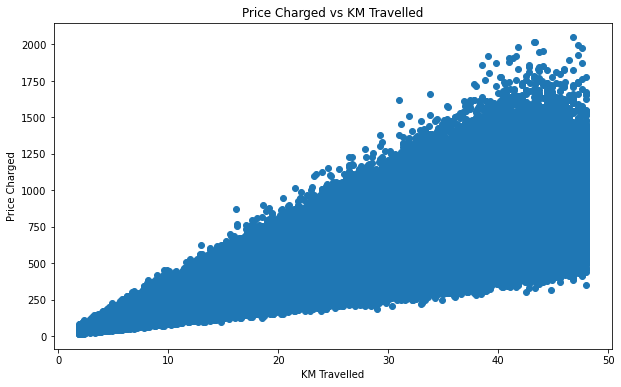

In [132]:
# Is there a relation between the price charged and the km travelled?
def price_vs_km():
    """
    Method:
        Plot the price charged vs km travelled
    """
    plt.figure(figsize=(10,6))
    plt.scatter(cab_data['km_traveled'], cab_data['price_charged'])
    plt.xlabel('KM Travelled')
    plt.ylabel('Price Charged')
    plt.title('Price Charged vs KM Travelled')
    plt.show()
    return


price_vs_km()

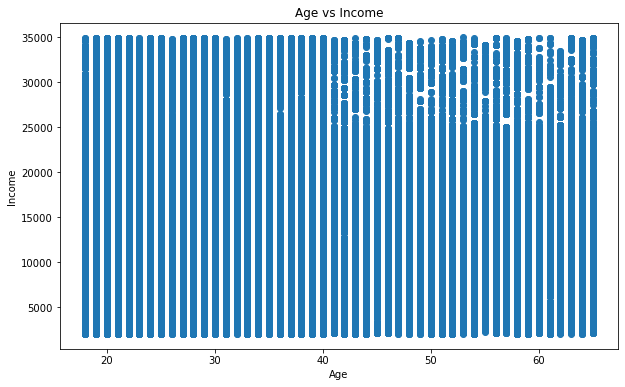

In [134]:
# Is there a relation between age and income?
def age_vs_income():
    """
    Method:
        Plot the age vs income
    """
    plt.figure(figsize=(10,6))
    plt.scatter(cab_data['age'], cab_data['monthly_income'])
    plt.xlabel('Age')
    plt.ylabel('Income')
    plt.title('Age vs Income')
    plt.show()
    return

age_vs_income()

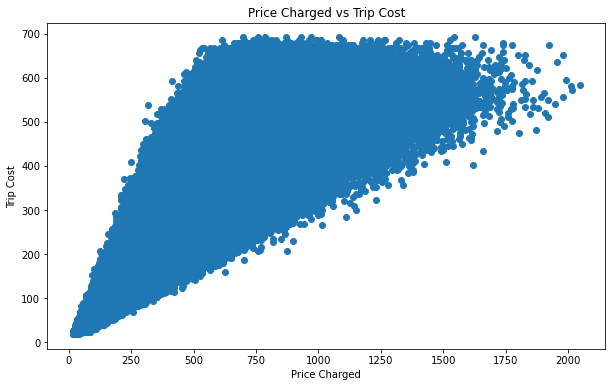

In [135]:
# What is the variance of price charged and trip cost?
def price_vs_trip_cost():
    """
    Method:
        Plot the price charged vs trip cost
    """
    plt.figure(figsize=(10,6))
    plt.scatter(cab_data['price_charged'], cab_data['trip_cost'])
    plt.xlabel('Price Charged')
    plt.ylabel('Trip Cost')
    plt.title('Price Charged vs Trip Cost')
    plt.show()
    return

price_vs_trip_cost()

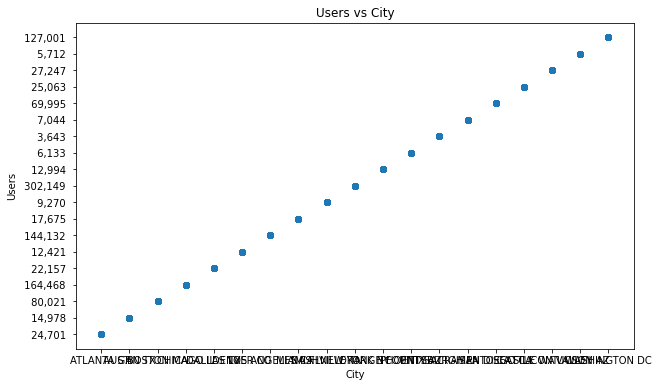

In [137]:
# Relation between the number of users and the city?
def users_vs_city():
    """
    Method:
        Plot the number of users vs city
    """
    plt.figure(figsize=(10,6))
    plt.scatter(cab_data['city'], cab_data['users'])
    plt.xlabel('City')
    plt.ylabel('Users')
    plt.title('Users vs City')
    plt.show()
    return

users_vs_city()

In [ ]:
# Relation between travel date and trip cost?
def travel_date_vs_trip_cost():
    """
    Method:
        Plot the travel date vs trip cost
    """
    plt.figure(figsize=(10,6))
    plt.scatter(cab_data['travel_date'], cab_data['trip_cost'])
    plt.xlabel('Travel Date')
    plt.ylabel('Trip Cost')
    plt.title('Travel Date vs Trip Cost')
    plt.show()
    return

# Statistical Analysis

In [ ]:
# Correlation of all features 
def correlation_all():
    """
    Method:
        Correlation of all features
    """
    corr = cab_data.corr()
    sns.heatmap(corr, annot=True)
    plt.show()
    return

In [ ]:
# Place the above function in a list to loop through    
plot_list = [price_vs_km, age_vs_income, price_vs_trip_cost, users_vs_city, travel_date_vs_trip_cost, correlation_all]

# Iterate through the list and plot the functions
def plot_relations(plot_list):
    for func in plot_list:
        func()
    return



plot_relations(plot_list)

In [ ]:
# Distribution of all features
def distribution_all():
    """
    Method:
        Distribution of all features
    """
    plt.figure(figsize=(10,6))
    plt.hist(cab_data['price_charged'], bins=50)
    plt.xlabel('Price Charged')
    plt.ylabel('Frequency')
    plt.title('Price Charged Distribution')
    plt.show()
    return

In [ ]:
# Which cab company has the highest number of users?
def highest_users():
    """
    Method:
        Which cab company has the highest number of users?
    """
    cab_data.groupby('company').users.max()
    return

In [ ]:
#Which cab company has the higher price charged per km?
def highest_price_charged():
    """
    Method:
        Which cab company has the higher price charged per km?
    """
    cab_data.groupby('company').price_charged.max()
    return 

Let's get a general statistical analysis of the data.

In [148]:
plot_list = [price_vs_km, age_vs_income, price_vs_trip_cost, users_vs_city, travel_date_vs_trip_cost, correlation_all]

# Iterate through the list and plot the functions
#def plot_relations(plot_list):
#    """ 
#    Method: 
#        Iterate through the list and plot the functions
#    """
#    for func in plot_list:
#        func()
#    return
#
#
#plot_relations(plot_list)

NameError: name 'travel_date_vs_trip_cost' is not defined

In [138]:
# Creat a class to contain all the functions
class Data_Analysis():
    """
    Class:
        Data_Analysis of all the functions related to relations between features
    """

    def __init__(self, cab_data):
        self.cab_data = cab_data
        return
    

    def price_km(self):
        """
        Method:
            Plot the price charged per km travelled
        """
        # We will need to determine the mean and standard deviation of the price charged per km travelled
        price_carried_per_km = (self.cab_data['price_charged'] / self.cab_data['km_traveled']) 
        plt.figure(figsize=(10,6))
        plt.scatter(self.cab_data['km_traveled'], price_carried_per_km)
        plt.xlabel('KM Travelled')
        plt.ylabel('Price Charged per KM')
        plt.title('Price Charged per KM vs KM Travelled')
        plt.show()
        return


    def age_vs_income(self):
        """
        Method:
            Plot the age vs income
        """
        plt.figure(figsize=(10,6))
        plt.scatter(self.cab_data['age'], self.cab_data['monthly_income'])
        plt.xlabel('Age')
        plt.ylabel('Income')
        plt.title('Age vs Income')
        plt.show()
        return
    

    def price_vs_trip_cost(self):
        """
        Method:
            Plot the price charged vs trip cost
        """
        plt.figure(figsize=(10,6))
        plt.scatter(self.cab_data['price_charged'], self.cab_data['trip_cost'])
        plt.xlabel('Price Charged')
        plt.ylabel('Trip Cost')
        plt.title('Price Charged vs Trip Cost')
        plt.show()
        return
    

    def price_vs_age(self):
        """
        Method:
            Plot the price charged vs age
        """
        plt.figure(figsize=(10,6))
        plt.scatter(self.cab_data['age'], self.cab_data['price_charged'])
        plt.xlabel('Age')
        plt.ylabel('Price Charged')
        plt.title('Price Charged vs Age')
        plt.show()
        return


    def travel_date_vs_trip_cost(self):
        """
        Method:
            Plot the travel date vs trip cost
        """
        fig, ax = plt.subplots(figsize=(7,5))
        ax.scatter(cab_data['travel_date'].dt.month, cab_data['trip_cost'])
        ax.set_xlabel('Travel Date', fontsize=12, fontweight='bold', color='black', labelpad=10) 
        ax.set_ylabel('Trip Cost', fontsize=12, fontweight='bold', color='black', labelpad=10)
        ax.set_title('Travel Date vs Trip Cost', fontsize=14, fontweight='bold', color='black', pad=10)
        plt.show()
        return


    def travel_date_vs_trip_cost(self):
        """
        Method:
            Plot the travel date vs trip cost
        """
        fig, ax = plt.subplots(figsize=(10,6))
        ax.hist(self.cab_data['price_charged'], bins=50)
        ax.set_xlabel('Price Charged')
        ax.set_ylabel('Frequency')
        ax.set_title('Price Charged Distribution')
        plt.show()
        return


    def correlation_all(self):
        """
        Method:
            Correlation of all features
        """
        corr = self.cab_data.corr()
        sns.heatmap(corr, annot=True)
        plt.show()
        return


    def distribution_all(self):
        """
        Method:
            Distribution of all features
        """
        plt.figure(figsize=(10,6))
        plt.hist(self.cab_data['price_charged'], bins=50)
        plt.xlabel('Price Charged')
        plt.ylabel('Frequency')
        plt.title('Price Charged Distribution')
        plt.show()
        return


    def plot_relations(self, plot_list):
        """
        Method:
            Iterate through the list and plot the functions
        """
        for func in plot_list:
            func()
        return



plot_relations(plot_list)

NameError: name 'plot_relations' is not defined

In [147]:
    
class UserMaxHighest(Data_Analysis):

    def __init__(self, cab_data):
        super().__init__(cab_data)
        return
        
    def highest_users(self):
        """
        Method:
            Which cab company has the highest number of users?
        """
        self.cab_data.groupby('company').users.max()
        return


    def highest_price_charged(self):
        """
        Method:
            Which cab company has the higher price charged per km?
        """
        self.cab_data.groupby('company').price_charged.max()
        return

    
UserMaxHighest(cab_data).sort_values()    

NameError: name 'highest_price_charged' is not defined

In [262]:
# Let's determine the number of users per city by
# creating a new column called 'users_per_city'
cab_data['users_per_city'] = cab_data.groupby('city').users.transform('count')

# Let's determine the number of users inferred by the population of each city
user_population = np.array([])
for city in cab_data['city'].unique():
    user_population = np.append(user_population, cab_data[cab_data['city'] == city]['users'].sum())


### Time Series Analysis

We can use statsmodels to perform time series analysis and get a general idea of the data over time.

In [265]:
from statsmodels.tsa import stattools as ts
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

In [266]:
# Create an univariate time series dataset indexed by the travel date
ts_data = pd.DataFrame(cab_data['trip_cost'], index=cab_data['travel_date'])

# Create a function to determine the autocorrelation of the time series
def autocorrelation(ts_data):
    """
    Method:
        Create a function to determine the autocorrelation of the time series
    """
    # Calculate the autocorrelation of the time series
    acf_data = ts.acf(ts_data)
    # Plot the autocorrelation of the time series
    plt.figure(figsize=(10,6))
    plt.plot(acf_data)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title('Autocorrelation of Trip Cost')
    plt.show()
    return


autocorrelation(ts_data)

In [ ]:
# Create a function to determine the partial autocorrelation of the time series
def partial_autocorrelation(ts_data):
    """
    Method:
        Create a function to determine the partial autocorrelation of the time series
    """
    # Calculate the partial autocorrelation of the time series
    pacf_data = ts.pacf(ts_data)
    # Plot the partial autocorrelation of the time series
    plt.figure(figsize=(10,6))
    plt.plot(pacf_data)
    plt.xlabel('Lag')
    plt.ylabel('Partial Autocorrelation')
    plt.title('Partial Autocorrelation of Trip Cost')
    plt.show()
    return

In [ ]:
# Create a function to determine the ADF test of the time series
def adf_test(ts_data):
    """
    Method:
        Create a function to determine the ADF test of the time series
    """
    # Calculate the ADF test of the time series
    adf_data = adfuller(ts_data)
    # Plot the ADF test of the time series
    plt.figure(figsize=(10,6))
    plt.plot(adf_data)
    plt.xlabel('Lag')
    plt.ylabel('ADF Test')
    plt.title('ADF Test of Trip Cost')
    plt.show()
    return
    

In [ ]:
# Create a function to determine the ARIMA model of the time series
def arima_model(ts_data):
    """
    Method:
        Create a function to determine the ARIMA model of the time series
    """
    # Calculate the ARIMA model of the time series
    arima_data = ARIMA(ts_data, order=(1,1,1)).fit()
    # Plot the ARIMA model of the time series
    plt.figure(figsize=(10,6))
    plt.plot(arima_data.fittedvalues)
    plt.xlabel('Date')
    plt.ylabel('Trip Cost')
    plt.title('ARIMA Model of Trip Cost')
    print(arima_data.summary())
    plt.show()
    return

### Building a G2M Strategy

1. Identify the buying center and personas.
2. Craft a value matrix to help identify messaging.
3. Test your messaging.
4. Optimize your ads based on the results of your tests before implementing them on a wide scale.
5. Understand your buyer’s journey.
6. Choose one (or more) of the four most common sales strategies.
7. Build brand awareness and demand generation with inbound and/or outbound methods.
8. Create content to get inbound leads.
9. Find ways to optimize your pipeline and increase conversion rates.
10. Analyze and shorten the sales cycle.
11. Reduce customer acquisition cost.
12. Strategize ways to tap into your existing customer base.
13. Adjust and iterate as you go.
14. Retain and delight your customers.

As a company owner - Using the G2M strategy the focus will be considereably to that of its Customers/Users. Th

1) Can we tell how much would be earned by quarter, period, year of a specific time period? (Predictive analysis, Time Series)

2) What areas (city) generate greatest profit? (Using population and number of users as a reference)

3) Customer preference over pink and yellow?

4) Average age of user? (if applicable create age bins)

5) Average income of user? (hist, highest income user - states)

6) If company purchases a specific fleet of vehicles what is the time range for ROI? (Apply hypothesis testing and A/B Testing)

7) What are users/consumers using more (cash or card)?

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(cab_data['price_charged'], bins=50)
ax.set_xlabel('Price Charged')
ax.set_ylabel('Frequency')
ax.set_title('Price Charged Distribution')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(cab_data['travel_date'].dt.month, cab_data['trip_cost'])
ax.set_xlabel('Travel Date', fontsize=12, fontweight='bold', color='black', labelpad=10) 
ax.set_ylabel('Trip Cost', fontsize=12, fontweight='bold', color='black', labelpad=10)
ax.set_title('Travel Date vs Trip Cost', fontsize=14, fontweight='bold', color='black', pad=10)
plt.show()

In [ ]:
price_carried_per_km = (cab_data['price_charged'] / cab_data['km_traveled']) 
plt.figure(figsize=(10,6))
plt.scatter(cab_data['km_traveled'], price_carried_per_km)
plt.xlabel('KM Travelled')
plt.ylabel('Price Charged per KM')
plt.title('Price Charged per KM vs KM Travelled')
plt.show()

In [ ]:
from scipy.stats import pearsonr

list1 = new_df['KM Travelled']
list2 = new_df['Price Change']
new_df, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % new_df)